# Importe de Librerias


In [110]:
import pandas as pd
file_path = '/home/jasitimbayz/NLP_Proyecto/encuestas_depurado.csv'

# Leer el archivo CSV
texto= pd.read_csv(file_path,dtype=str)






In [111]:
texto.head()

,responseid,comentario,sentimiento,categoria
0,R_5yh7OyznCm1OQgh,Muy buena la atención,Positivo,NaN
1,R_6mx9YuxgU7Ei7v5,Q sigan así adelante,Positivo,NaN
2,R_19p3PhMPU8C6bH2,Sigan haciendo descuentos con diferentes produ...,Positivo,NaN
3,R_1QgI4QkBJqh26Rj,EXCELENTE ATENCIÓN,Positivo,NaN
4,R_5QFDe9k5xm3Dwxk,Ninguna. Gracias,Positivo,NaN


Análisis de la data

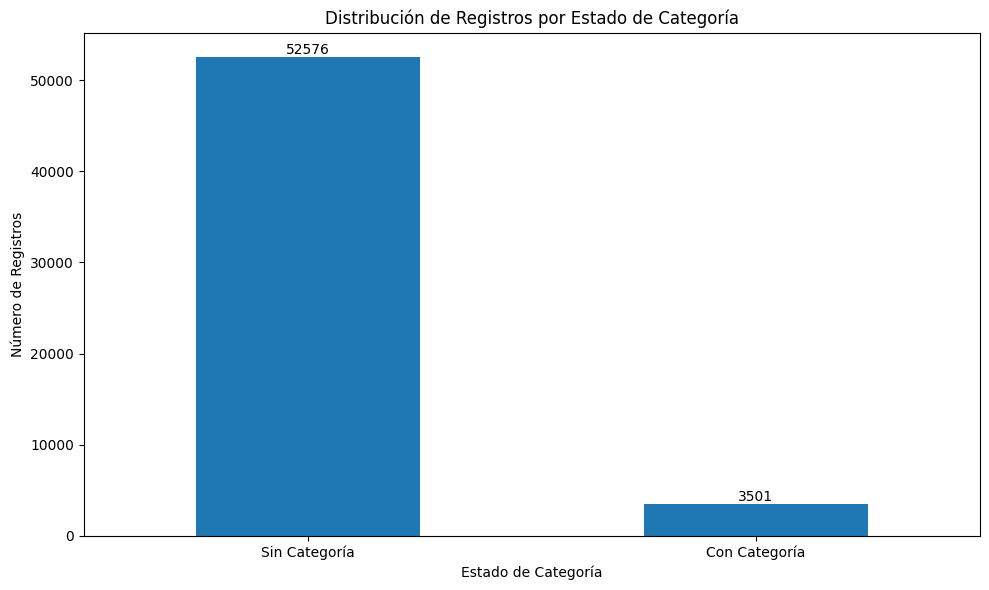

Registros sin categoría asignada (NaN): 3501
Registros con categoría: 52576


In [132]:
import pandas as pd
import matplotlib.pyplot as plt


# Contar los registros
categoria_count = texto['categoria'].isna().value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categoria_count.plot(kind='bar')

# Personalizar el gráfico
plt.title('Distribución de Registros por Estado de Categoría')
plt.xlabel('Estado de Categoría')
plt.ylabel('Número de Registros')
plt.xticks([0, 1], ['Sin Categoría', 'Con Categoría'], rotation=0)

# Añadir etiquetas de valor en las barras
for i, v in enumerate(categoria_count):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores
print("Registros sin categoría asignada (NaN):", categoria_count[False])
print("Registros con categoría:", categoria_count[True])



Distribución de categorías

In [129]:
# Filtrar las filas donde 'categoria' no es NaN
texto_con_categoria = texto[texto['categoria'].notna()].copy()

# Ver la distribución de las categorías
distribucion_categorias = texto_con_categoria['categoria'].value_counts()

# Mostrar la distribución
print(distribucion_categorias)

# Ver el porcentaje de cada clase
porcentaje_categorias = texto_con_categoria['categoria'].value_counts(normalize=True) * 100
print(porcentaje_categorias)

categoria
Servicio    2198
Producto    1303
Name: count, dtype: int64
categoria
Servicio    62.782062
Producto    37.217938
Name: proportion, dtype: float64


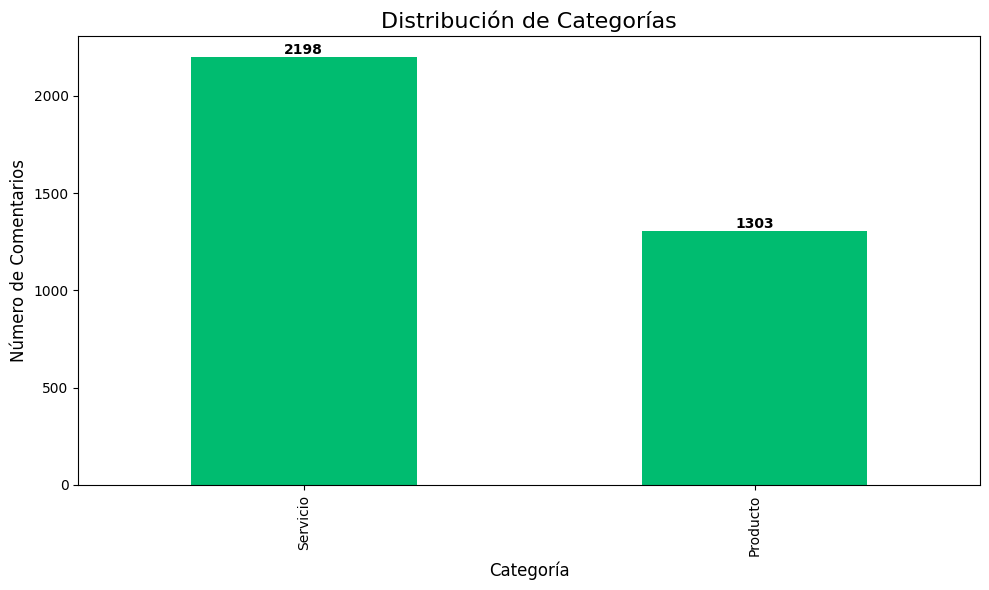

In [133]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
ax = distribucion_categorias.plot(kind='bar', color='#00BC70', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Distribución de Categorías', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Comentarios', fontsize=12)

# Añadir etiquetas de valor en las barras
for i, v in enumerate(distribucion_categorias):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Ajustar el diseño para evitar que se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Ejemplos de comentarios de cada categoría

In [115]:
for categoria in texto_con_categoria['categoria'].unique():
    print(f"\nEjemplos de la categoría '{categoria}':")
    print(texto_con_categoria[texto_con_categoria['categoria'] == categoria]['comentario'].head())


Ejemplos de la categoría 'Servicio':
16     deben de cambiar a la jefa de la local y al su...
63     Buenas noches ayúdeme por favor últimamente no...
103    pésimo asesoramiento del chico flaco de la eco...
114    El personal es demasiado lento para la atenció...
175    La compra que realizaba era de $12 10 centavos...
Name: comentario, dtype: object

Ejemplos de la categoría 'Producto':
94     Casi nunca tienen la medicina que busco, o la ...
96     Muestran una supuesta oferta, te cobran lo que...
122                                         Todo.bien ❤️
130    Me vendieron un medicamento que no es, mi rece...
137                     Excelente servicio  recomendados
Name: comentario, dtype: object


In [116]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))

def palabras_mas_comunes(categoria):
    palabras = ' '.join(texto_con_categoria[texto_con_categoria['categoria'] == categoria]['comentario']).lower().split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return Counter(palabras).most_common(10)

for categoria in texto_con_categoria['categoria'].unique():
    print(f"\nPalabras más comunes en '{categoria}':")
    print(palabras_mas_comunes(categoria))


Palabras más comunes en 'Servicio':
[('local', 522), ('atención', 455), ('si', 388), ('q', 355), ('factura', 348), ('comprar', 244), ('cliente', 228), ('personal', 226), ('producto', 216), ('solo', 213)]

Palabras más comunes en 'Producto':
[('local', 172), ('productos', 125), ('precios', 109), ('si', 108), ('comprar', 107), ('producto', 103), ('q', 103), ('atención', 100), ('stock', 92), ('buena', 90)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocesamiento

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar acentos
    text = ''.join(c for c in unicodedata.normalize('NFD', text)
                   if unicodedata.category(c) != 'Mn')

    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenizar
    tokens = word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]

    # Unir los tokens de vuelta a una cadena
    return ' '.join(tokens)



# Aplicar preprocesamiento a los comentarios
texto_con_categoria['comentario_procesado'] = texto_con_categoria['comentario'].apply(preprocess_text)


# Codificar las categorías
le = LabelEncoder()
texto_con_categoria['categoria_encoded'] = le.fit_transform(texto_con_categoria['categoria'])

# Guardar un DataFrame solo con las columnas relevantes
texto_preprocesado = texto_con_categoria[['comentario_procesado', 'categoria_encoded']]
texto_preprocesado.head()


,comentario_procesado,categoria_encoded
16,deben cambiar jefa local supervisor desposta a...,1
63,buenas noches ayudeme favor ultimamente envian...,1
94,casi nunca medicina busco incompleta precios m...,0
96,muestran supuesta oferta cobran aparece pagina...,0
103,pesimo asesoramiento chico flaco economica par...,1


Word2vec, padding y train, val y test

In [118]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Tokenizar primero
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texto_con_categoria['comentario_procesado'])
sequences = tokenizer.texts_to_sequences(texto_con_categoria['comentario_procesado'])

# Actualizar vocab_size
vocab_size = len(tokenizer.word_index) + 1

# Entrenar el modelo Word2Vec con las secuencias tokenizadas
sentences = [[tokenizer.index_word[w] for w in seq] for seq in sequences]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=1)

print(f"Tamaño del vocabulario: {vocab_size}")

# Crear una matriz de embeddings
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]
    else:
        # Para palabras no en Word2Vec, usar un vector aleatorio
        embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), 100)

# Añadir padding a las secuencias
max_length = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_length)

# Preparar las etiquetas
y = to_categorical(texto_con_categoria['categoria_encoded'])

# Dividir en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Imprimir información sobre los datos preparados
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_val: {X_val.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_val: {y_val.shape}")
print(f"Forma de y_test: {y_test.shape}")

Tamaño del vocabulario: 7296
Forma de X_train: (2100, 275)
Forma de X_val: (700, 275)
Forma de X_test: (701, 275)
Forma de y_train: (2100, 2)
Forma de y_val: (700, 2)
Forma de y_test: (701, 2)


Class_weights

In [119]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_val.argmax(axis=1)),  # Convertimos de one-hot a etiquetas numéricas
    y=y_train_val.argmax(axis=1)
)

# Convertir a diccionario para pasarlo al modelo
class_weights_dict = dict(enumerate(class_weights))

print("Pesos de las clases:")
print(class_weights_dict)

# Verificar la distribución de clases
class_distribution = np.sum(y_train_val, axis=0)
print("\nDistribución de clases en el conjunto de entrenamiento + validación:")
for i, count in enumerate(class_distribution):
    print(f"Clase {i}: {count} ({count/len(y_train_val)*100:.2f}%)")



Pesos de las clases:
{0: 1.348747591522158, 1: 0.7945516458569807}

Distribución de clases en el conjunto de entrenamiento + validación:
Clase 0: 1038.0 (37.07%)
Clase 1: 1762.0 (62.93%)


In [44]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 537.6 kB/s eta 0:00:00


Optimización de parámetros para la LSTM

In [46]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Masking, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import F1Score

def build_model(hp):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, mask_zero=True, trainable=False))
    model.add(Masking(mask_value=0))

    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(LSTM(
            units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=True if i < hp.Int('num_lstm_layers', 1, 3) - 1 else False
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(y_train.shape[1], activation='softmax'))

    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy', F1Score(average='weighted', name='f1_score')]
    )

    return model

# Crear el tuner con un objetivo explícito
tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective('val_f1_score', direction='max'),  # Especificamos que queremos maximizar el F1 score
    max_epochs=100,
    factor=3,
    directory='keras_tuner',
    project_name='nlp_model_tuning'
)


stop_early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[stop_early],
    class_weight=class_weights_dict
)

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

history = best_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[stop_early],
    class_weight=class_weights_dict
)

test_loss, test_accuracy, test_f1 = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")
print(f"Test F1 score: {test_f1}")

Trial 35 Complete [00h 02m 39s]
val_f1_score: 0.7147871255874634

Best val_f1_score So Far: 0.7256226539611816
Total elapsed time: 01h 23m 54s

Search: Running Trial #36

Value             |Best Value So Far |Hyperparameter
2                 |2                 |num_lstm_layers
256               |32                |lstm_units_0
0.3               |0.3               |dropout_0
0.00092673        |0.0046642         |learning_rate
128               |256               |lstm_units_1
0                 |0                 |dropout_1
128               |32                |lstm_units_2
0.4               |0                 |dropout_2
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
66/66 [==============================] - 88s 1s/step - loss: 0.6704 - accuracy: 0.6219 - f1_score: 0.6273 - val_loss: 0.5923 - val_accuracy: 0.6943 - v

KeyboardInterrupt: 

Red LSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 275, 100)          729600    
                                                                 
 masking_2 (Masking)         (None, 275, 100)          0         
                                                                 
 lstm_19 (LSTM)              (None, 275, 32)           17024     
                                                                 
 dropout_19 (Dropout)        (None, 275, 32)           0         
                                                                 
 lstm_20 (LSTM)              (None, 256)               295936    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                

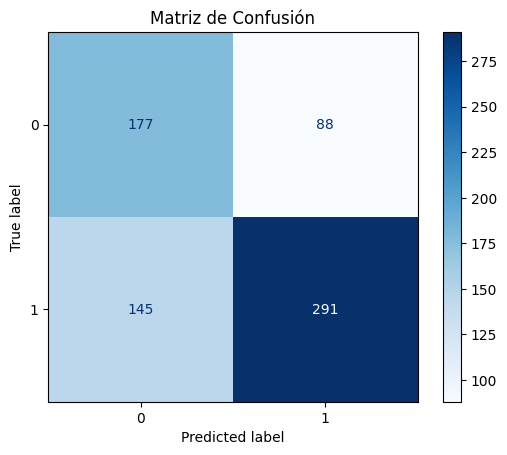

22/22 [==============================] - 4s 169ms/step - loss: 0.6050 - accuracy: 0.6676 - f1_score: 0.6721
Precisión en el conjunto de prueba: 0.6676
F1-score en el conjunto de prueba: 0.6721


In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Masking, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear el modelo con los mejores hiperparámetros
best_model = Sequential([
    Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, mask_zero=True, trainable=False),
    Masking(mask_value=0),
    LSTM(32, return_sequences=True),
    Dropout(0.3),
    LSTM(256),
    Dropout(0),
    Dense(y_train.shape[1], activation='softmax')
])

best_model.compile(
    optimizer=Adam(learning_rate=0.0046642),
    loss='categorical_crossentropy',
    metrics=['accuracy', F1Score(average='weighted', name='f1_score')]
)

# Imprimir el resumen del modelo para verificar la estructura
best_model.summary()

# Entrenar el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# Evaluar el modelo
y_pred = best_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Métricas finales
test_loss, test_accuracy, test_f1 = best_model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"F1-score en el conjunto de prueba: {test_f1:.4f}")

Chat de prueba

In [128]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_text(text, max_length):
    tokens = text.lower().split()
    return ' '.join(tokens[:max_length])

def predict_category(model, text, tokenizer, max_length):
    # Preprocesar el texto
    processed_text = preprocess_text(text, max_length)

    # Tokenizar y padear el texto
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)

    # Hacer la predicción
    prediction = model.predict(padded_sequence)

    # Obtener la clase predicha
    predicted_class = np.argmax(prediction[0])

    # Mapear la clase a una etiqueta
    category_labels = ['Producto', 'Servicio']
    predicted_category = category_labels[predicted_class]

    return predicted_category, prediction[0]


while True:
    user_input = input("Ingresa una frase (o 'salir' para terminar): ")
    if user_input.lower() == 'salir':
        break

    category, probabilities = predict_category(best_model, user_input, tokenizer, max_length)
    print(f"Categoría predicha: {category}")
    print(f"Probabilidades: Producto: {probabilities[0]:.4f}, Servicio: {probabilities[1]:.4f}")
    print()

Ingresa una frase (o 'salir' para terminar): producto bueno
1/1 [==============================] - 0s 164ms/step
Categoría predicha: Producto
Probabilidades: Producto: 0.7140, Servicio: 0.2860

Ingresa una frase (o 'salir' para terminar): salir


Revisión de haber llenado todos los campos

In [50]:
import numpy as np

import pandas as pd


# Identificar las filas sin categoría
filas_sin_categoria = texto[texto['categoria'].isna()]

# Preprocesar los comentarios sin categoría
comentarios_sin_categoria = filas_sin_categoria['comentario'].apply(preprocess_text)

# Tokenizar y padear los comentarios sin categoría
X_sin_categoria = tokenizer.texts_to_sequences(comentarios_sin_categoria)
X_sin_categoria = pad_sequences(X_sin_categoria, maxlen=max_length)

# Hacer predicciones
predicciones = best_model.predict(X_sin_categoria)
categorias_predichas = np.argmax(predicciones, axis=1)

# Mapear las predicciones numéricas a etiquetas de texto
mapa_categorias = {0: 'Producto', 1: 'Servicio'}
categorias_predichas_texto = [mapa_categorias[pred] for pred in categorias_predichas]

# Actualizar el DataFrame original con las predicciones
texto.loc[texto['categoria'].isna(), 'categoria'] = categorias_predichas_texto

# Verificar los resultados
print("Número de filas sin categoría antes:", filas_sin_categoria.shape[0])
print("Número de filas sin categoría después:", texto['categoria'].isna().sum())
print("\nDistribución de categorías después de la predicción:")
print(texto['categoria'].value_counts(normalize=True) * 100)

# Guardar el DataFrame actualizado si es necesario
texto.to_csv('/home/jasitimbayz/NLP_Proyecto/encuestas_con_predicciones.csv', index=False)

1643/1643 [==============================] - 287s 175ms/step
Número de filas sin categoría antes: 52576
Número de filas sin categoría después: 0

Distribución de categorías después de la predicción:
categoria
Producto    69.27974
Servicio    30.72026
Name: proportion, dtype: float64


# Segunda implementación

In [134]:
import pandas as pd
file_path = '/home/jasitimbayz/NLP_Proyecto/encuestas_con_predicciones.csv'

# Leer el archivo CSV
texto= pd.read_csv(file_path,dtype=str)



from transformers import pipeline
import pandas as pd

# Cargar el pipeline de Zero-shot classification
#classifier = pipeline("zero-shot-classification")

# Etiquetas posibles para la clasificación
#etiquetas_posibles = ["Positivo", "Negativo", "Neutro"]

# Generar nuevas etiquetas a partir de los comentarios usando el modelo preentrenado
#texto['sentimiento'] = texto['comentario'].apply(lambda comentario: classifier(comentario, candidate_labels=etiquetas_posibles)['labels'][0])


texto.head(9)


,responseid,comentario,sentimiento,categoria
0,R_5yh7OyznCm1OQgh,Muy buena la atención,Positivo,Producto
1,R_6mx9YuxgU7Ei7v5,Q sigan así adelante,Positivo,Producto
2,R_19p3PhMPU8C6bH2,Sigan haciendo descuentos con diferentes produ...,Positivo,Producto
3,R_1QgI4QkBJqh26Rj,EXCELENTE ATENCIÓN,Positivo,Producto
4,R_5QFDe9k5xm3Dwxk,Ninguna. Gracias,Positivo,Producto
5,R_6aKsVnzkbXSnFEB,Sigan con la buena atención,Positivo,Servicio
6,R_6qeZi8CmkbO0Ajb,Positivo,Positivo,Producto
7,R_7IY4FcQkfVJx3nF,Tiene todo producto y el personal es amable,Positivo,Producto
8,R_7C3f0QYdsF0KPoL,Lo que no me agrada es que la factura electrón...,Positivo,Servicio


In [135]:
file_path = '/home/jasitimbayz/NLP_Proyecto/encuestas_depurado.csv'

# Leer el archivo CSV
texto_antiguo= pd.read_csv(file_path,dtype=str)
texto_antiguo.head(9)

,responseid,comentario,sentimiento,categoria
0,R_5yh7OyznCm1OQgh,Muy buena la atención,Positivo,NaN
1,R_6mx9YuxgU7Ei7v5,Q sigan así adelante,Positivo,NaN
2,R_19p3PhMPU8C6bH2,Sigan haciendo descuentos con diferentes produ...,Positivo,NaN
3,R_1QgI4QkBJqh26Rj,EXCELENTE ATENCIÓN,Positivo,NaN
4,R_5QFDe9k5xm3Dwxk,Ninguna. Gracias,Positivo,NaN
5,R_6aKsVnzkbXSnFEB,Sigan con la buena atención,Positivo,NaN
6,R_6qeZi8CmkbO0Ajb,Positivo,Positivo,NaN
7,R_7IY4FcQkfVJx3nF,Tiene todo producto y el personal es amable,Positivo,NaN
8,R_7C3f0QYdsF0KPoL,Lo que no me agrada es que la factura electrón...,Positivo,NaN


In [137]:
print(texto['categoria'].value_counts(normalize=True) * 100)
print(texto['sentimiento'].value_counts(normalize=True) * 100)

categoria
Producto    69.27974
Servicio    30.72026
Name: proportion, dtype: float64
sentimiento
Positivo    87.807836
Neutro       7.106300
Negativo     5.085864
Name: proportion, dtype: float64


Distribución de categorías

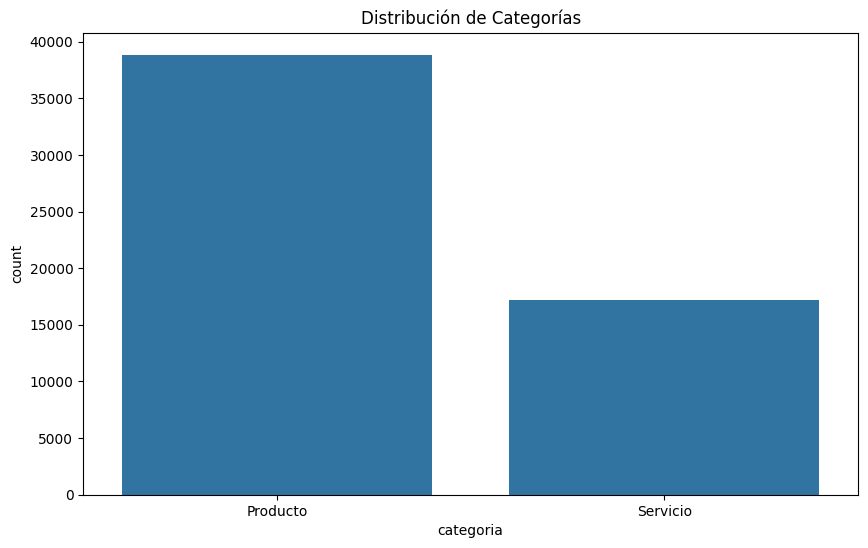

In [138]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='categoria', data=texto)
plt.title('Distribución de Categorías')
plt.show()

Distribución del sentimiento

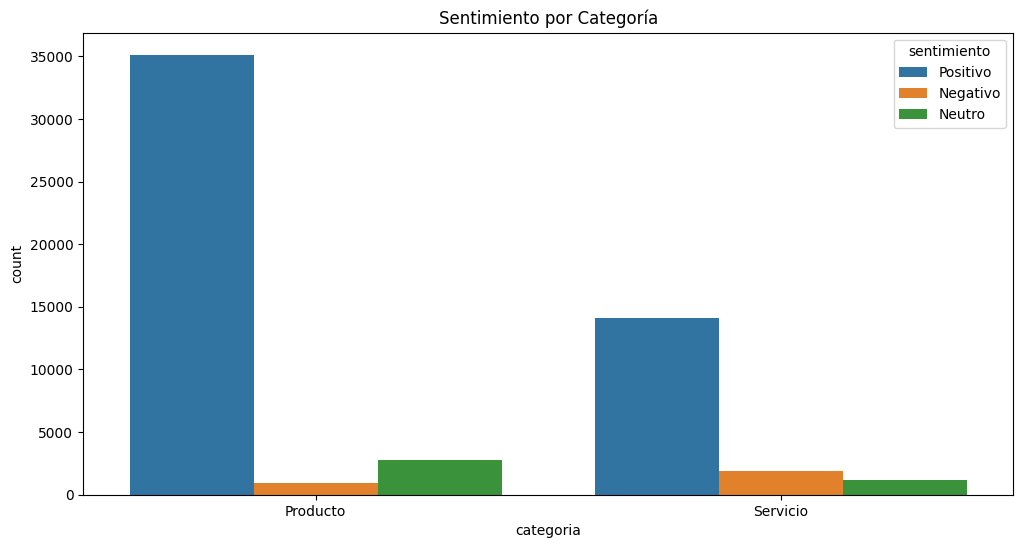

In [139]:
plt.figure(figsize=(12, 6))
sns.countplot(x='categoria', hue='sentimiento', data=texto)
plt.title('Sentimiento por Categoría')
plt.show()

Preprocesamiento

In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from gensim.models import Word2Vec

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar acentos
    text = ''.join(c for c in unicodedata.normalize('NFD', text)
                   if unicodedata.category(c) != 'Mn')

    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenizar
    tokens = word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

# Preprocesar los comentarios
texto['tokens'] = texto['comentario'].apply(preprocess_text)

# Entrenar el modelo Word2Vec
w2v_model = Word2Vec(sentences=texto['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Tokenización
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texto['tokens'].apply(' '.join))
X = tokenizer.texts_to_sequences(texto['tokens'].apply(' '.join))
X = pad_sequences(X, maxlen=max_len)

# Crear la matriz de embedding
embedding_matrix = np.zeros((max_words, 100))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        try:
            embedding_vector = w2v_model.wv[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), 100)

y_sentimiento = pd.get_dummies(texto['sentimiento']).values
y_categoria = pd.get_dummies(texto['categoria']).values

# Dividir los datos en entrenamiento + validación y prueba
X_train_val, X_test, y_sent_train_val, y_sent_test, y_cat_train_val, y_cat_test = train_test_split(
    X, y_sentimiento, y_categoria, test_size=0.2, random_state=42)

# Dividir los datos de entrenamiento + validación en entrenamiento y validación
X_train, X_val, y_sent_train, y_sent_val, y_cat_train, y_cat_val = train_test_split(
    X_train_val, y_sent_train_val, y_cat_train_val, test_size=0.25, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_sent_train:", y_sent_train.shape)
print("Forma de y_sent_val:", y_sent_val.shape)
print("Forma de y_sent_test:", y_sent_test.shape)
print("Forma de y_cat_train:", y_cat_train.shape)
print("Forma de y_cat_val:", y_cat_val.shape)
print("Forma de y_cat_test:", y_cat_test.shape)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Forma de X_train: (33645, 100)
Forma de X_val: (11216, 100)
Forma de X_test: (11216, 100)
Forma de y_sent_train: (33645, 3)
Forma de y_sent_val: (11216, 3)
Forma de y_sent_test: (11216, 3)
Forma de y_cat_train: (33645, 2)
Forma de y_cat_val: (11216, 2)
Forma de y_cat_test: (11216, 2)


Optimizacion con keras turner

In [141]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import class_weight
import keras_tuner as kt

# Asegurarse de que las etiquetas sean de tipo float32
y_sent_train = y_sent_train.astype('float32')
y_sent_val = y_sent_val.astype('float32')
y_sent_test = y_sent_test.astype('float32')
y_cat_train = y_cat_train.astype('float32')
y_cat_val = y_cat_val.astype('float32')
y_cat_test = y_cat_test.astype('float32')

# Calcular los pesos de clase
y_sent_integers = y_sent_train.argmax(axis=1)
y_cat_integers = y_cat_train.argmax(axis=1)
sent_class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_sent_integers), y=y_sent_integers)
cat_class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_cat_integers), y=y_cat_integers)
sent_class_weights = dict(enumerate(sent_class_weights))
cat_class_weights = dict(enumerate(cat_class_weights))

def build_model(hp):
    inputs = keras.Input(shape=(max_len,))
    x = layers.Embedding(max_words, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)(inputs)

    # Número de capas LSTM como hiperparámetro
    num_lstm_layers = hp.Int('num_lstm_layers', 1, 3)

    for i in range(num_lstm_layers):
        lstm_units = hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32)
        return_sequences = i < num_lstm_layers - 1  # True para todas las capas excepto la última
        x = layers.LSTM(lstm_units, return_sequences=return_sequences)(x)

        dropout_rate = hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.4, step=0.1)
        x = layers.Dropout(dropout_rate)(x)

    sentiment_output = layers.Dense(3, activation='softmax', name='sentiment')(x)
    category_output = layers.Dense(2, activation='softmax', name='category')(x)

    model = keras.Model(inputs=inputs, outputs=[sentiment_output, category_output])

    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-3, sampling='LOG')
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss={'sentiment': 'categorical_crossentropy', 'category': 'categorical_crossentropy'},
                  loss_weights={'sentiment': 1.0, 'category': 1.0},
                  metrics={'sentiment': ['accuracy', tf.keras.metrics.F1Score(average='weighted', name='f1_score')],
                           'category': ['accuracy', tf.keras.metrics.F1Score(average='weighted', name='f1_score')]})
    return model

tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective('val_loss', direction='min'),
    max_epochs=50,
    factor=3,
    directory='keras_tuner',
    project_name='sentiment_category_classification'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, {'sentiment': y_sent_train, 'category': y_cat_train},
             epochs=50,
             validation_data=(X_val, {'sentiment': y_sent_val, 'category': y_cat_val}),
             callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejores hiperparámetros: {best_hps.values}")

model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train, {'sentiment': y_sent_train, 'category': y_cat_train},
                    epochs=50,
                    validation_data=(X_val, {'sentiment': y_sent_val, 'category': y_cat_val}),
                    callbacks=[stop_early],
                    class_weight={'sentiment': sent_class_weights, 'category': cat_class_weights})

test_results = model.evaluate(X_test, {'sentiment': y_sent_test, 'category': y_cat_test})
print("Resultados de prueba:", test_results)

y_pred_sent, y_pred_cat = model.predict(X_test)

from sklearn.metrics import f1_score

y_true_sent = np.argmax(y_sent_test, axis=1)
y_pred_sent = np.argmax(y_pred_sent, axis=1)
f1_sent = f1_score(y_true_sent, y_pred_sent, average='weighted')

y_true_cat = np.argmax(y_cat_test, axis=1)
y_pred_cat = np.argmax(y_pred_cat, axis=1)
f1_cat = f1_score(y_true_cat, y_pred_cat, average='weighted')

print(f"F1 Score (Sentimiento): {f1_sent}")
print(f"F1 Score (Categoría): {f1_cat}")

Reloading Tuner from keras_tuner/sentiment_category_classification/tuner0.json

Search: Running Trial #23

Value             |Best Value So Far |Hyperparameter
64                |128               |lstm_units
0.2               |0.1               |dropout_rate
0.0006315         |0.00071686        |learning_rate
3                 |None              |num_lstm_layers
128               |None              |lstm_units_0
0.2               |None              |dropout_rate_0
32                |None              |lstm_units_1
0.4               |None              |dropout_rate_1
64                |None              |lstm_units_2
0.3               |None              |dropout_rate_2
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round



Epoch 1/2
   5/1052 [..............................] - ETA: 7:47 - loss: 1.7237 - sentiment_loss: 1.0414 - category_loss: 0.6823 - sentiment_accuracy: 0.7563 - sentiment_f1_score: 0.7886 - category_accuracy: 0.5875 - category_f1_score: 0.5927

KeyboardInterrupt: 

In [98]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
import numpy as np
from sklearn.metrics import f1_score

def create_weighted_loss(class_weights):
    def weighted_loss(y_true, y_pred):
        y_true_indices = tf.argmax(y_true, axis=1)
        weights = tf.gather(class_weights, y_true_indices)
        loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
        weighted_loss = tf.multiply(loss, weights)
        return tf.reduce_mean(weighted_loss)
    return weighted_loss

def create_model(max_len, max_words, embedding_matrix, sent_class_weights, cat_class_weights):
    inputs = Input(shape=(max_len,))
    x = layers.Embedding(max_words, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)(inputs)

    # Usando los parámetros de la imagen, pero cambiando return_sequences a False
    x = layers.LSTM(128, return_sequences=False)(x)
    x = layers.Dropout(0.1)(x)

    sentiment_output = layers.Dense(3, activation='softmax', name='sentiment')(x)
    category_output = layers.Dense(2, activation='softmax', name='category')(x)

    model = Model(inputs=inputs, outputs=[sentiment_output, category_output])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00071686)

    model.compile(optimizer=optimizer,
                  loss={'sentiment': create_weighted_loss(tf.constant(list(sent_class_weights.values()), dtype=tf.float32)),
                        'category': create_weighted_loss(tf.constant(list(cat_class_weights.values()), dtype=tf.float32))},
                  loss_weights={'sentiment': 1.0, 'category': 1.0},
                  metrics={'sentiment': ['accuracy', tf.keras.metrics.F1Score(average='weighted', name='f1_score')],
                           'category': ['accuracy', tf.keras.metrics.F1Score(average='weighted', name='f1_score')]})

    return model

# Asumiendo que tienes definidos max_len, max_words, embedding_matrix, y los datos de entrenamiento/validación/prueba
model = create_model(max_len, max_words, embedding_matrix, sent_class_weights, cat_class_weights)

# Definir Early Stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Entrenar el modelo
history = model.fit(
    X_train,
    {'sentiment': y_sent_train, 'category': y_cat_train},
    epochs=20,  # Según la imagen
    validation_data=(X_val, {'sentiment': y_sent_val, 'category': y_cat_val}),
    callbacks=[stop_early]
)

# Evaluar el modelo
test_results = model.evaluate(X_test, {'sentiment': y_sent_test, 'category': y_cat_test})
print("Resultados de prueba:", test_results)

# Hacer predicciones
y_pred_sent, y_pred_cat = model.predict(X_test)

# Calcular F1 Score para sentimiento
y_true_sent = np.argmax(y_sent_test, axis=1)
y_pred_sent = np.argmax(y_pred_sent, axis=1)
f1_sent = f1_score(y_true_sent, y_pred_sent, average='weighted')

# Calcular F1 Score para categoría
y_true_cat = np.argmax(y_cat_test, axis=1)
y_pred_cat = np.argmax(y_pred_cat, axis=1)
f1_cat = f1_score(y_true_cat, y_pred_cat, average='weighted')

print(f"F1 Score (Sentimiento): {f1_sent}")
print(f"F1 Score (Categoría): {f1_cat}")

Epoch 1/20
1052/1052 [==============================] - 181s 170ms/step - loss: 1.1813 - sentiment_loss: 0.8888 - category_loss: 0.2925 - sentiment_accuracy: 0.6562 - sentiment_f1_score: 0.7265 - category_accuracy: 0.8809 - category_f1_score: 0.8833 - val_loss: 1.1548 - val_sentiment_loss: 0.8795 - val_category_loss: 0.2752 - val_sentiment_accuracy: 0.6115 - val_sentiment_f1_score: 0.6914 - val_category_accuracy: 0.8827 - val_category_f1_score: 0.8858
Epoch 2/20
1052/1052 [==============================] - 179s 170ms/step - loss: 1.1137 - sentiment_loss: 0.8576 - category_loss: 0.2562 - sentiment_accuracy: 0.6566 - sentiment_f1_score: 0.7278 - category_accuracy: 0.8996 - category_f1_score: 0.9013 - val_loss: 1.1267 - val_sentiment_loss: 0.8692 - val_category_loss: 0.2575 - val_sentiment_accuracy: 0.6460 - val_sentiment_f1_score: 0.7186 - val_category_accuracy: 0.9147 - val_category_f1_score: 0.9150
Epoch 3/20
1052/1052 [==============================] - 179s 170ms/step - loss: 1.0882 -

In [99]:
# Hacer predicciones
y_pred_sent, y_pred_cat = model.predict(X_test)

# Calcular F1 Score para sentimiento
y_true_sent = np.argmax(y_sent_test, axis=1)
y_pred_sent = np.argmax(y_pred_sent, axis=1)
f1_sent = f1_score(y_true_sent, y_pred_sent, average='weighted')

# Calcular F1 Score para categoría
y_true_cat = np.argmax(y_cat_test, axis=1)
y_pred_cat = np.argmax(y_pred_cat, axis=1)
f1_cat = f1_score(y_true_cat, y_pred_cat, average='weighted')

print(f"F1 Score (Sentimiento): {f1_sent}")
print(f"F1 Score (Categoría): {f1_cat}")

351/351 [==============================] - 11s 32ms/step
F1 Score (Sentimiento): 0.7367461801462161
F1 Score (Categoría): 0.9312189186814469


Matriz de confusion

351/351 [==============================] - 11s 31ms/step
Reporte de clasificación para sentimiento:
              precision    recall  f1-score   support

           0       0.43      0.63      0.51       569
           1       0.11      0.48      0.18       780
           2       0.95      0.68      0.79      9867

    accuracy                           0.66     11216
   macro avg       0.50      0.60      0.50     11216
weighted avg       0.87      0.66      0.74     11216


Reporte de clasificación para categoría:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7782
           1       0.86      0.92      0.89      3434

    accuracy                           0.93     11216
   macro avg       0.91      0.93      0.92     11216
weighted avg       0.93      0.93      0.93     11216



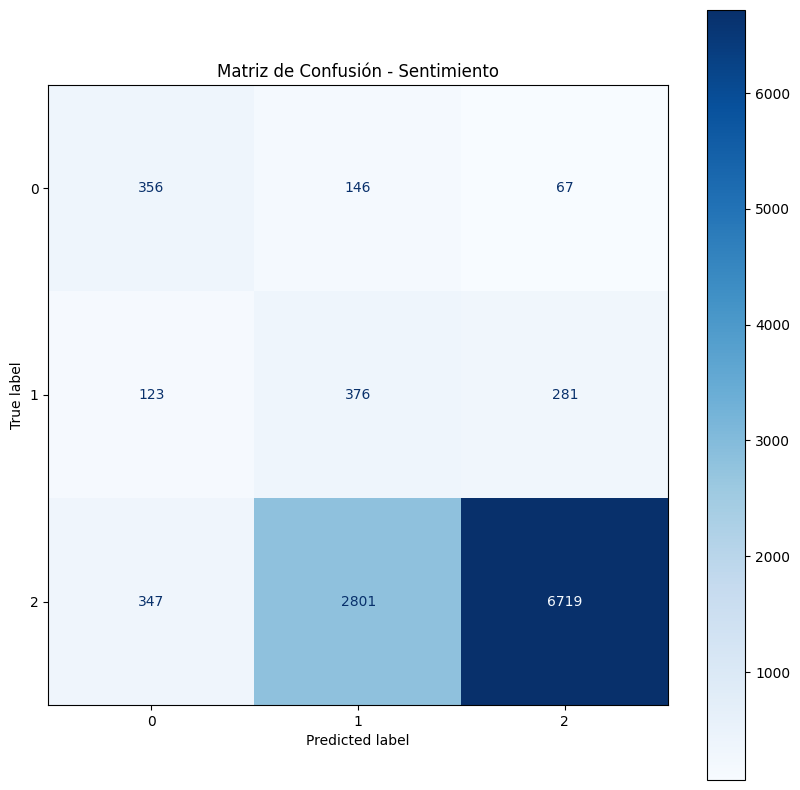

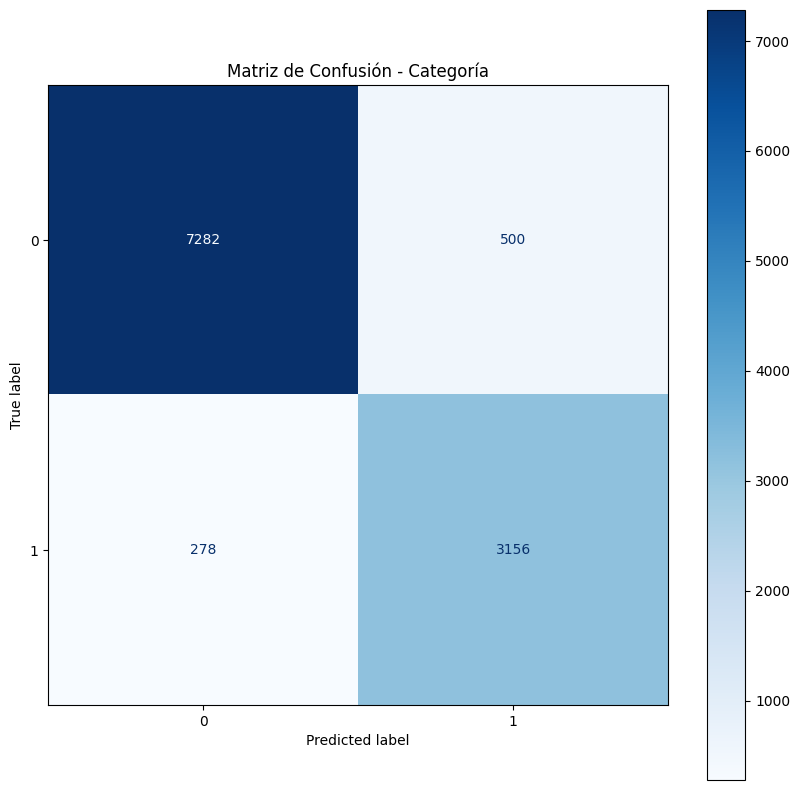


F1 Score (Sentimiento): 0.7367461801462161
F1 Score (Categoría): 0.9312189186814469


In [107]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Hacer predicciones
y_pred_sent, y_pred_cat = model.predict(X_test)

# Para el sentimiento
y_true_sent = np.argmax(y_sent_test, axis=1)
y_pred_sent = np.argmax(y_pred_sent, axis=1)

# Para la categoría
y_true_cat = np.argmax(y_cat_test, axis=1)
y_pred_cat = np.argmax(y_pred_cat, axis=1)

# Reporte de clasificación para sentimiento
print("Reporte de clasificación para sentimiento:")
print(classification_report(y_true_sent, y_pred_sent))

# Reporte de clasificación para categoría
print("\nReporte de clasificación para categoría:")
print(classification_report(y_true_cat, y_pred_cat))

# Matriz de confusión para sentimiento
cm_sent = confusion_matrix(y_true_sent, y_pred_sent)
disp_sent = ConfusionMatrixDisplay(confusion_matrix=cm_sent)
fig, ax = plt.subplots(figsize=(10,10))
disp_sent.plot(ax=ax, cmap='Blues')  # Usando 'Blues' como colormap
plt.title("Matriz de Confusión - Sentimiento")
plt.show()

# Matriz de confusión para categoría
cm_cat = confusion_matrix(y_true_cat, y_pred_cat)
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat)
fig, ax = plt.subplots(figsize=(10,10))
disp_cat.plot(ax=ax, cmap='Blues')  # Usando 'Blues' como colormap
plt.title("Matriz de Confusión - Categoría")
plt.show()

# F1 Scores
f1_sent = f1_score(y_true_sent, y_pred_sent, average='weighted')
f1_cat = f1_score(y_true_cat, y_pred_cat, average='weighted')

print(f"\nF1 Score (Sentimiento): {f1_sent}")
print(f"F1 Score (Categoría): {f1_cat}")

Prueba de chat

In [106]:
import numpy as np
import tensorflow as tf

def preprocess_text(text, max_len):
    tokens = text.lower().split()
    return ' '.join(tokens[:max_len])

def predict_sentiment_and_category(model, text, tokenizer, max_len):
    # Preprocesar el texto
    processed_text = preprocess_text(text, max_len)

    # Tokenizar y padear el texto
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=max_len)

    # Hacer la predicción
    sentiment_pred, category_pred = model.predict(padded_sequence)

    # Obtener las clases predichas
    sentiment_class = np.argmax(sentiment_pred[0])
    category_class = np.argmax(category_pred[0])

    # Mapear las clases a etiquetas (ajusta esto según tus etiquetas reales)
    sentiment_labels = ['Negativo', 'Neutro', 'Positivo']
    category_labels = ['Producto', 'Servicio']

    predicted_sentiment = sentiment_labels[sentiment_class]
    predicted_category = category_labels[category_class]

    return predicted_sentiment, predicted_category

while True:
    user_input = input("Ingresa una frase (o 'salir' para terminar): ")
    if user_input.lower() == 'salir':
        break

    sentiment, category = predict_sentiment_and_category(model, user_input, tokenizer, max_len)
    print(f"Sentimiento predicho: {sentiment}")
    print(f"Categoría predicha: {category}")
    print()

Ingresa una frase (o 'salir' para terminar): pesimo articulo
1/1 [==============================] - 0s 60ms/step
Sentimiento predicho: Negativo
Categoría predicha: Producto

Ingresa una frase (o 'salir' para terminar): mala atencion
1/1 [==============================] - 0s 54ms/step
Sentimiento predicho: Negativo
Categoría predicha: Servicio

Ingresa una frase (o 'salir' para terminar): tiempo largo
1/1 [==============================] - 0s 60ms/step
Sentimiento predicho: Negativo
Categoría predicha: Producto

Ingresa una frase (o 'salir' para terminar): servicio maravilloso
1/1 [==============================] - 0s 58ms/step
Sentimiento predicho: Neutro
Categoría predicha: Producto

Ingresa una frase (o 'salir' para terminar): salir
